In [351]:
# import libraries
from sklearn.datasets import load_boston#datasets
import pandas as pd
import numpy as np
# from scipy.spatial.distance import pdist
# from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as snf
from sklearn.linear_model import LogisticRegression

In [352]:
dt=pd.read_csv('Desktop/Python/train.csv')

dt['Sexb']=dt['Sex'].map(lambda x:1 if x=="male" else 0)


In [353]:
target=dt['Survived']
dataA=dt[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','Sexb']]
dataB=dataA.fillna(value=np.mean(dataA['Age']))
data1=dataB[['Age','Pclass','Parch','SibSp','Fare','Sexb']]
dataB.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sexb
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


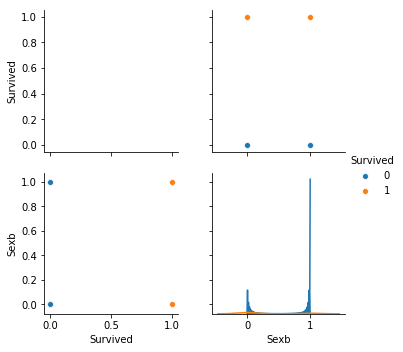

In [354]:
sns.pairplot(dataB, vars=['Survived','Sexb'],hue='Survived')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


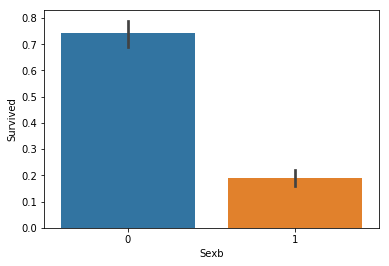

In [355]:
# sns.jointplot(x='Sexb',y='Survived',data=dataB,size=5)
sns.barplot(x="Sexb", y="Survived",data=dataB)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


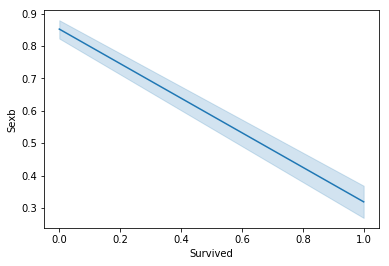

In [356]:
sns.lineplot(x='Survived',y='Sexb',data=dataB)

From the above three graphs, Sexb/Gender has a strong correlation to Survival rate. The above graph shows a correlation between survivors and women passengers. (legend key for Sexb = 1(Male);0(Female))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


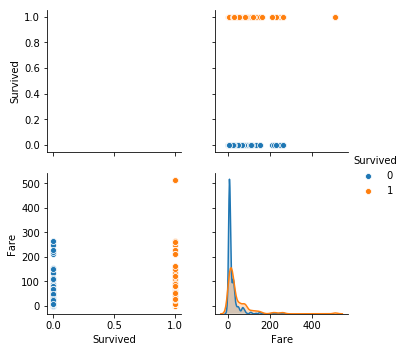

In [357]:
sns.pairplot(dataB, vars=['Survived','Fare'],hue='Survived')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


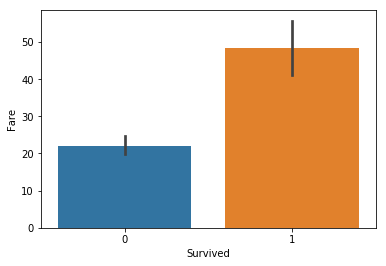

In [358]:
sns.barplot(x="Survived", y="Fare",data=dataB)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


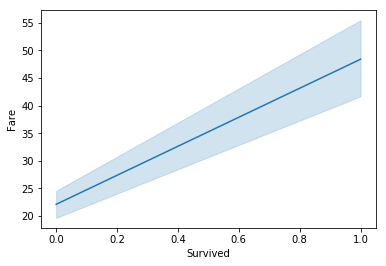

In [359]:
sns.lineplot(x='Survived',y='Fare',data=dataB)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


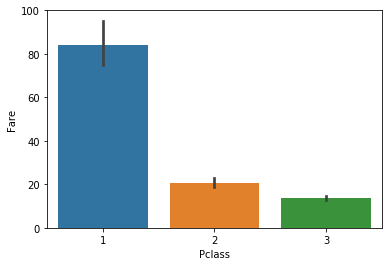

In [360]:
sns.barplot(x="Pclass", y="Fare",data=dataB)

From the charts above, the higher the fare - the greater the survival rate. Probably because the higher fares were rooms on the deck where it was easier to escape from. This is a good correlation and should be considered. Note: We need to also assess if Pclass bears the same correlation.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


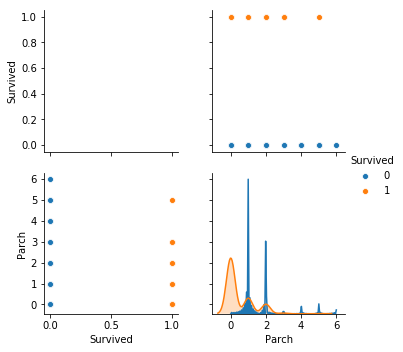

In [361]:
sns.pairplot(dataB, vars=['Survived','Parch'],hue='Survived')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


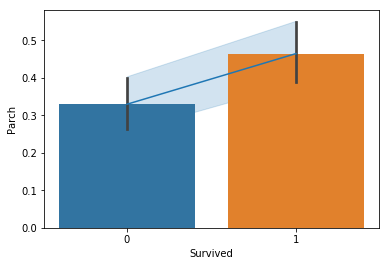

In [362]:
sns.barplot(x="Survived", y="Parch",data=dataB)
sns.lineplot(x='Survived',y='Parch',data=dataB)

Positive correlation with Parch. Higher the parch, the greater is the chance of survival. However the spread isnt too high so its not a very strong correlation.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


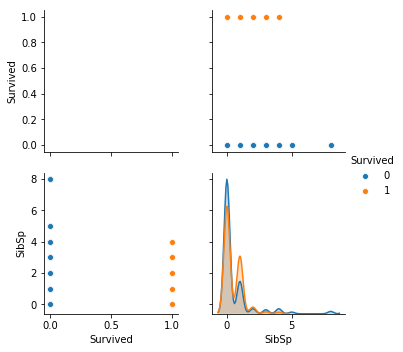

In [363]:
sns.pairplot(dataB, vars=['Survived','SibSp'],hue='Survived')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


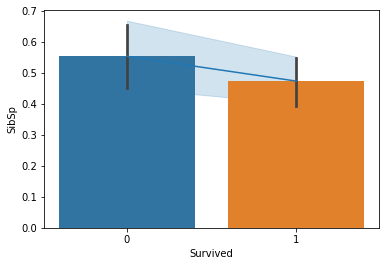

In [364]:
# sns.pairplot(dataB, vars=['Survived','Parch'],hue='Survived')
sns.barplot(x="Survived", y="SibSp",data=dataB)
sns.lineplot(x='Survived',y='SibSp',data=dataB)

Lesser the Siblings and Spouses, the greater the chance of survival.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


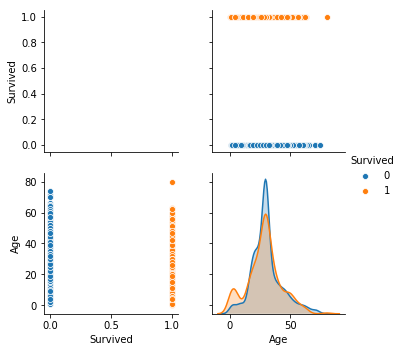

In [365]:
sns.pairplot(dataB, vars=['Survived','Age'],hue='Survived')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


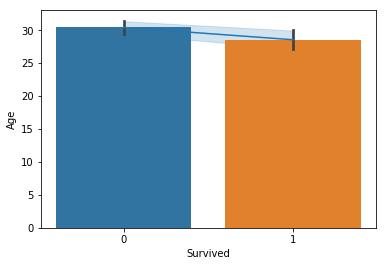

In [366]:
sns.barplot(x="Survived", y="Age",data=dataB)
sns.lineplot(x='Survived',y='Age',data=dataB)

Inconcusive about Age. Survivors are slightly younger. However, there is a positive correlation and this will be a part of the training set. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


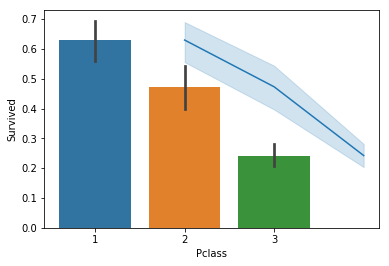

In [367]:
sns.barplot(x="Pclass", y="Survived",data=dataB)
sns.lineplot(x='Pclass',y='Survived',data=dataB)

Class 1 has a better chance of survival. Data is negatively correlated and can be used to train.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


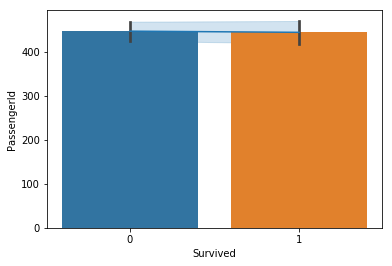

In [368]:
sns.barplot(x="Survived", y="PassengerId",data=dataB)
sns.lineplot(x='Survived',y='PassengerId',data=dataB)

Passenger ID doesnt have any correlation to the dataset or survival right. Hence it is excluded. 

In [369]:
# split dataset into training and testing data sets. 

X_train,X_test,Y_train,Y_test=train_test_split(data1,target,test_size=0.30)

In [370]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(623, 6)
(268, 6)
(623,)
(268,)


In [371]:
# fitting using stats model
import statsmodels.formula.api as snf
model_1=snf.OLS(Y_train,X_train).fit()
prediction_1=model_1.predict(X_train)#predict y_train
prediction_2=model_1.predict(X_test)#predict y_test
# print("X Train prediction:",prediction_1)
# print("X Test prediction:",prediction_2)

In [372]:
rmse_training=sqrt(mean_squared_error(Y_train,prediction_1))
print('Root Mean Square Error(RMSE) for training data',rmse_training)
rmse_test=sqrt(mean_squared_error(Y_test,prediction_2))
print('RMSE for testing data',rmse_test)

Root Mean Square Error(RMSE) for training data 0.45414867814015175
RMSE for testing data 0.4311124767835683


In [373]:
# these two steps below will do everything above. fit does the prediction and score provides the accuracy... closer to 1 is good. 
# model1_2=LinearRegression().fit(X_train,Y_train)
# model2_2=LinearRegression().fit(X_test,Y_test)

model1_2=LogisticRegression().fit(X_train,Y_train)
# model1_2.coef_
print(model1_2.score(X_train,Y_train))
print(model1_2.score(X_test,Y_test))

0.7961476725521669
0.8283582089552238
